# OpenCV2 for face detection

In [25]:
# IMport all necessary libraries

import numpy as np
import cv2 as cv
from IPython.display import display
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

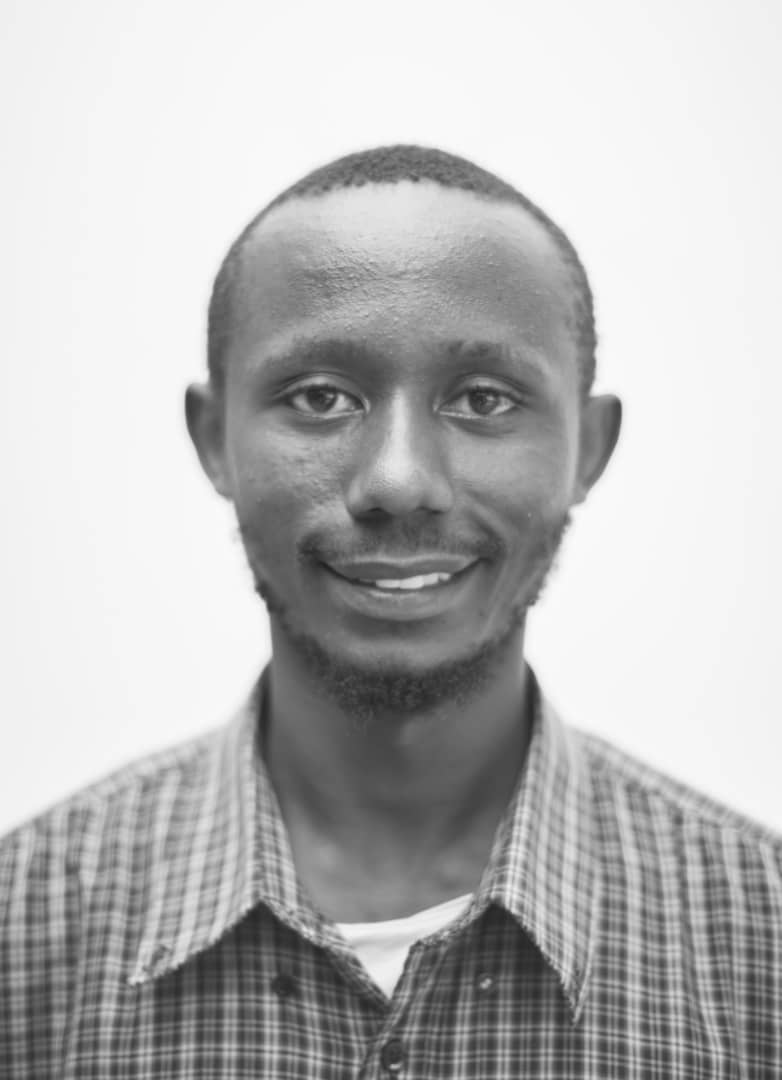

In [31]:
# Open the image you need to use

img = cv.imread('images/carlos.jpeg')
gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)
pil_img=Image.fromarray(gray,mode="L")
display(pil_img)

In [12]:
img.shape

(1080, 782, 3)

In [14]:
# Convert image to RGB
def convertToRGB(image):
    return cv.cvtColor(image, cv.COLOR_BGR2RGB)

In [15]:
# Add necessary cascades for frontface detection
haar_cascade_face = cv2.CascadeClassifier('cascades/data/haarcascade_frontalface_alt2.xml')

In [18]:
# Face detection 
# N.B remember to use gray image for detector to able to detect
faces_rects = haar_cascade_face.detectMultiScale(gray, scaleFactor = 1.2, minNeighbors = 5);

# Let us print the no. of faces found
print('Faces found: ', len(faces_rects))

Faces found:  1


In [58]:
''' 
    Our next step is to loop over all the co-ordinates it returned and draw rectangles around them using Open CV.
    We will be drawing a green rectangle with thicknessof 2
'''


for (x,y,w,h) in faces_rects:
    print(x, y, w, h)
    cv.rectangle(img, (x, y), (x+w, y+h), (0, 255, 0), 5)

175 227 452 452


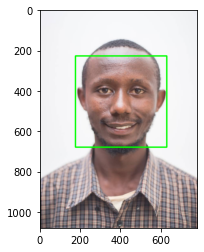

In [59]:
# Display the image with face detected already
#convert image to RGB and show image
plt.imshow(convertToRGB(img))

# Let us create a generalised function for the entire face detection process.

In [35]:
def detect_faces(cascade, test_image, scaleFactor = 1.1):
    # create a copy of the image to prevent any changes to the original one.
    image_copy = test_image.copy()
    
    #convert the test image to gray scale as opencv face detector expects gray images
    gray_image = cv.cvtColor(image_copy, cv.COLOR_BGR2GRAY)
    
    # Applying the haar classifier to detect faces
    faces_rect = cascade.detectMultiScale(gray_image, scaleFactor=scaleFactor, minNeighbors=5)
    
    for (x, y, w, h) in faces_rect:
        cv.rectangle(image_copy, (x, y), (x+w, y+h), (0, 255, 0), 15)
        
    return image_copy

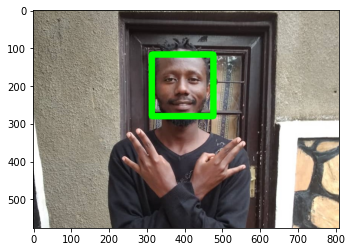

In [48]:
#loading image
test_image2 = cv.imread('images/7.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))

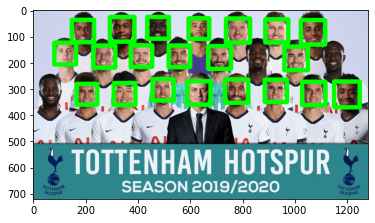

In [57]:
#loading image
test_image2 = cv.imread('images/team.jpg')

#call the function to detect faces
faces = detect_faces(haar_cascade_face, test_image2, 1.1)

#convert to RGB and display image
plt.imshow(convertToRGB(faces))